##### **STOCK PRICE FORECASTING USING LSTM**

#### 1. Importing all the necessary Libraries for data pre-processing, plotting and working with date time data

In [29]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### 1.1 Load and Read data to get an overiview of the dataset

In [30]:
data = pd.read_csv('MicrosoftStock.csv')
print(data.head())
print(data.info())
print(data.describe())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB
None
               index         open         high          low 

#### 1.2 Initial Data Visualization

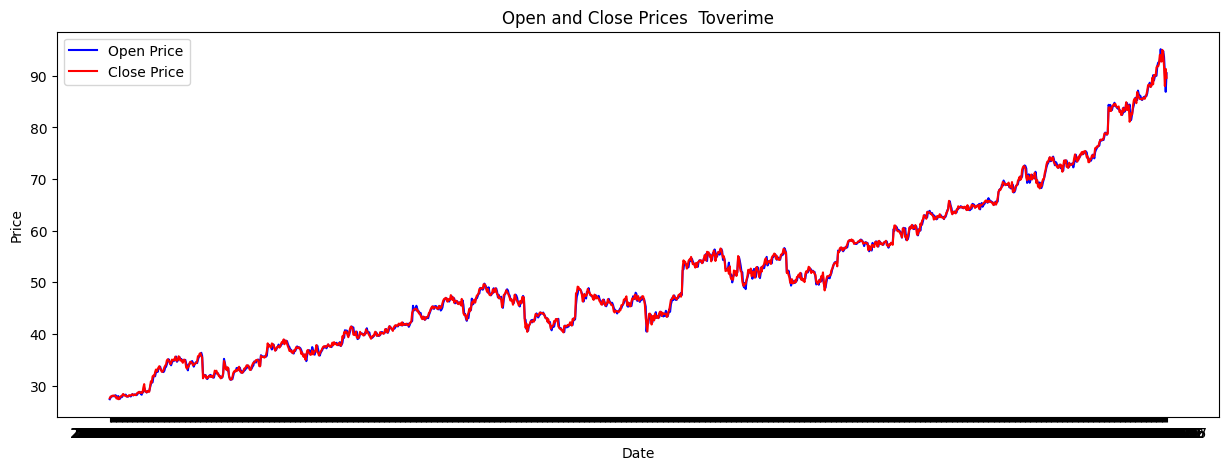

In [31]:
## Plot 1 : Open and Close Prices of time
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['open'], label='Open Price', color='blue')
plt.plot(data['date'], data['close'], label='Close Price', color='red')
plt.title('Open and Close Prices  Toverime')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

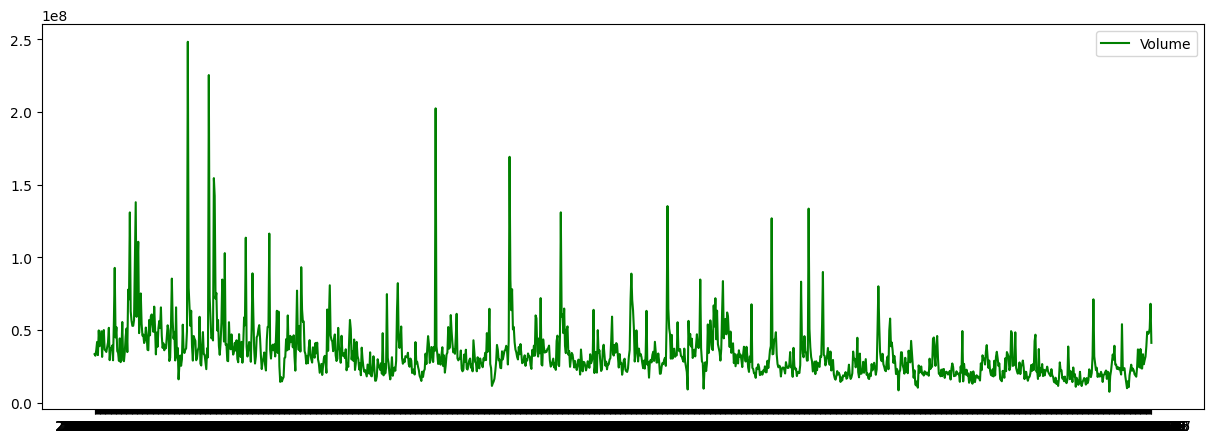

In [32]:
plt.figure(figsize=(15, 5))
plt.plot(data['date'], data['volume'], label='Volume', color = "green")
plt.legend()
plt.show()

##### **2. Pre-Processing of Dataset**

##### 2.1 Remove non-numeric data and checking for correlation

In [33]:
## Remove Non- numeric data
numeric_data = data.select_dtypes(include=["int64", "float64"])
print(numeric_data.head())

    index   open   high    low  close    volume
0  390198  27.35  27.71  27.31  27.55  33318306
1  390199  27.65  27.92  27.50  27.86  32247549
2  390200  27.88  28.00  27.75  27.88  35990829
3  390201  27.93  28.11  27.88  28.03  41715530
4  390202  27.92  28.06  27.87  28.04  32663174


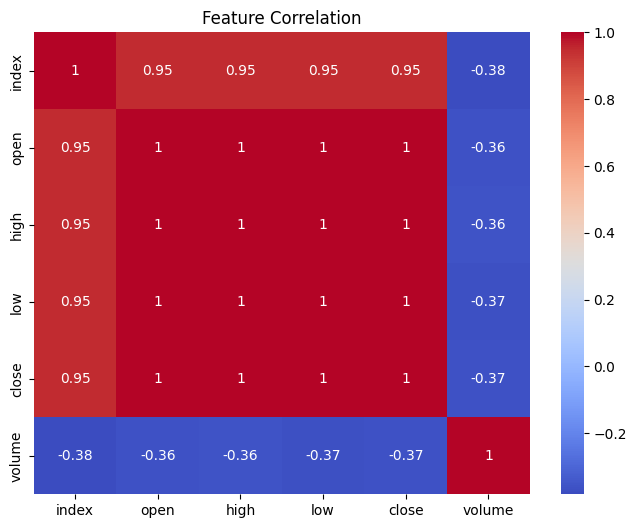

In [34]:
## Plot Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

##### 2.2 Convert the Data into Data Time format and create date filter

In [35]:
# Convert to date to datetime data
data['date'] = pd.to_datetime(data['date'])
prediction = data.loc[
    (data['date'] >= '2013-01-01') & 
    (data['date'] <= '2018-12-31')
    ]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1259 non-null   int64         
 1   date    1259 non-null   datetime64[ns]
 2   open    1259 non-null   float64       
 3   high    1259 non-null   float64       
 4   low     1259 non-null   float64       
 5   close   1259 non-null   float64       
 6   volume  1259 non-null   int64         
 7   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 78.8+ KB
None


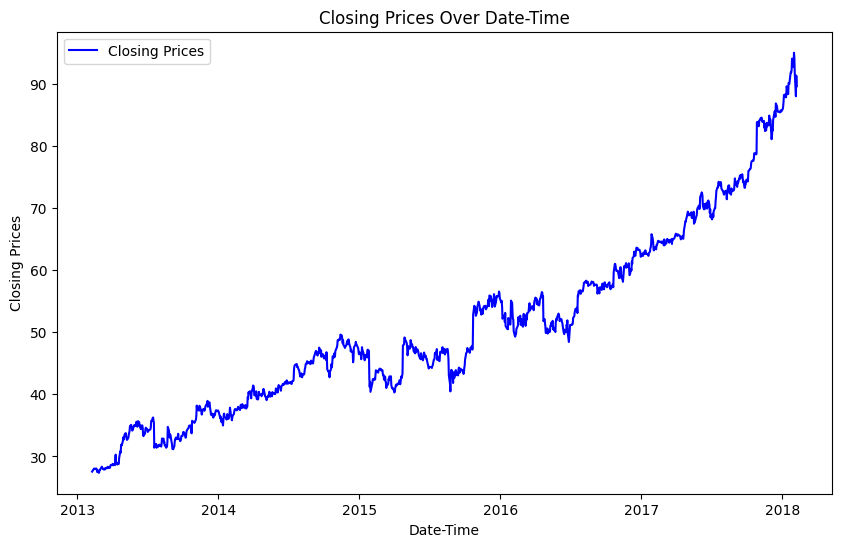

In [36]:
## Plot Closing prices over Date-Time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['close'], label='Closing Prices', color='blue')
plt.xlabel('Date-Time')
plt.ylabel('Closing Prices')
plt.title('Closing Prices Over Date-Time')
plt.legend()
plt.show()

#### **3 Prepare for the LSTM Model (Sequential)**

##### 3.1 Prepare the data for fitting the Model

In [ ]:
## Model will be trained on closing prices of the stocks

stock_close = data.filter(["close"])
dataset = stock_close.values
dataset = dataset.reshape(-1,1)
print(dataset.shape)

(1259, 1)


In [42]:
training_data_len = int(np.ceil(len(dataset)*0.95)) 
print("training data len: ", training_data_len)

training data len:  1197


In [43]:
## Scaling the input data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [44]:
## Training data
training_data = scaled_data[:training_data_len]

In [45]:
## X and y Split using arrays
X_train, y_train = [], []


In [46]:
## Creating a sliding window for the stock of 60 days
for i in range(60, len(training_data)): 
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
## Now reshaping it to 3D tensor for tensorflow
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [49]:
## Building the Model 
model = keras.models.Sequential()

## First layer
model.add(keras.layers.LSTM(64, return_sequences = True, input_shape =(X_train.shape[1],1)))

## Second layer
model.add(keras.layers.LSTM(64, return_sequences = False))

## Third layer
model.add(keras.layers.Dense(128, activation = "relu"))

## Fourth layer
model.add(keras.layers.Dropout(0.5))

## Final output layer
model.add(keras.layers.Dense(1))


d:\Projects\github\LSTM_Stock_Forecasting\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
## Model 
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
## Model Compiled
model.compile(optimizer='adam', 
              loss='mae', 
              metrics=[keras.metrics.RootMeanSquaredError()]
              )

In [53]:
## Training Data
training = model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.2226 - root_mean_squared_error: 0.3269
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.1344 - root_mean_squared_error: 0.1859
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.1255 - root_mean_squared_error: 0.1699
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1160 - root_mean_squared_error: 0.1631
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1101 - root_mean_squared_error: 0.1505
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1112 - root_mean_squared_error: 0.1495
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1113 - root_mean_squared_error: 0.1524
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1085 - root_mean_squared_error: 0.1489
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1056 - root_mean_squared_error: 0.1458
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1068 - root_mean_squared_error: 0.1458

In [55]:
## Preparing the test data
test_data = scaled_data[training_data_len-60:]
X_test , y_test = [], dataset[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [56]:
## Make predictions 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


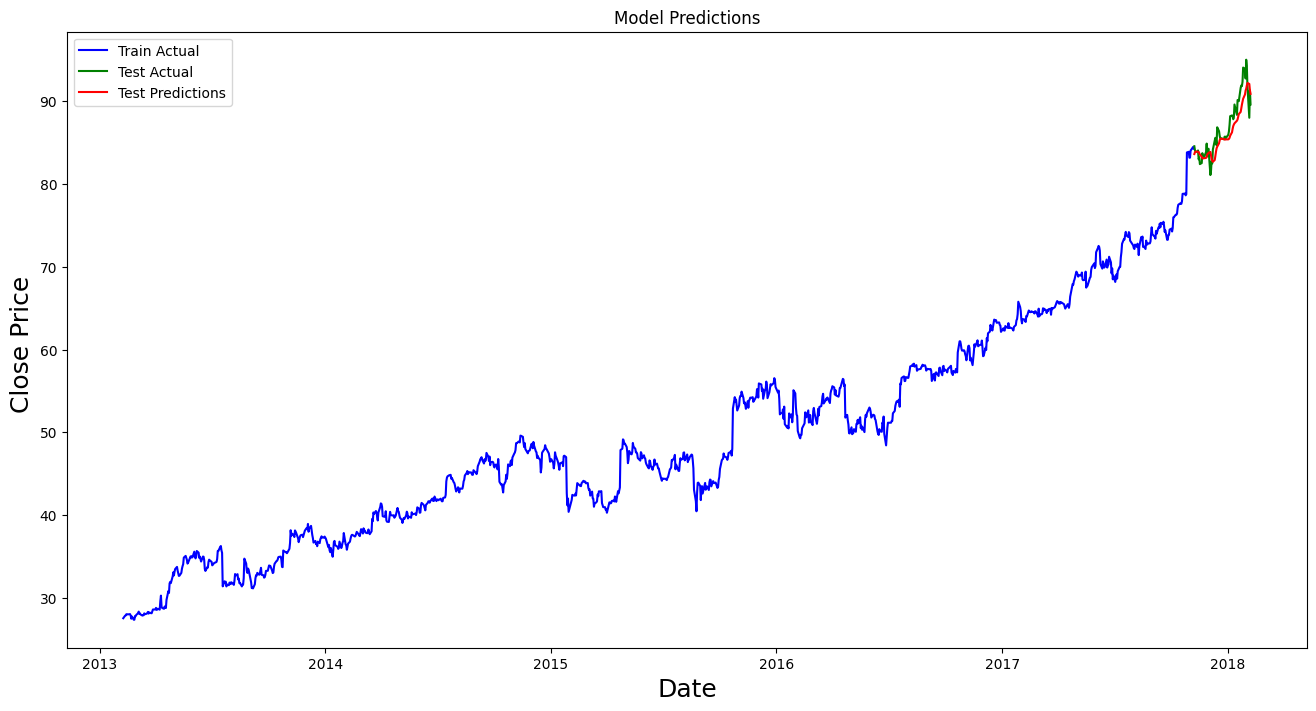

In [63]:
## Plotting the data
train = data[:training_data_len]
test = data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.plot(train['date'], train['close'], label = "Train Actual", color = "b")
plt.plot(test['date'], test['close'], label = "Test Actual", color = "g")
plt.plot(test['date'], predictions, label = "Test Predictions", color = "r")
plt.title('Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.legend()
plt.show()